In [79]:
from __future__ import print_function
import pandas as pd
import numpy as np
from scipy import  stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot


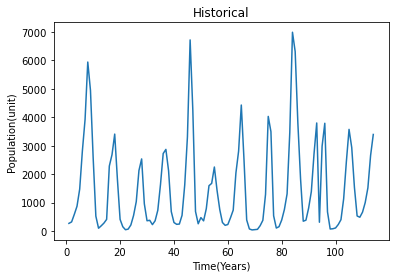

In [80]:
data = pd.read_excel('cat.xlsx',index_col = "Year")
data1=data
data=data.to_numpy()
data=data.flatten()
plt.plot(np.arange(1,115),data)
plt.xlabel('Time(Years)')
plt.ylabel('Population(unit)')
plt.title("Historical")
plt.savefig('hist.pdf')

In [81]:
from statsmodels.tsa.stattools import adfuller as ADF
ADF(data['Bobcats'])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

<AxesSubplot:xlabel='Year'>

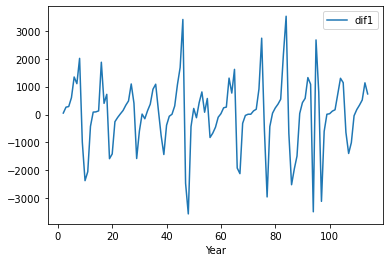

In [82]:
d_data = data1.diff().dropna()
d_data.columns = ['dif1']
d_data.plot()



In [83]:
ADF(d_data['dif1'])


(-8.539141670071592,
 9.891632921677726e-14,
 7,
 105,
 {'1%': -3.4942202045135513,
  '5%': -2.889485291005291,
  '10%': -2.5816762131519275},
 1650.420587467904)

In [84]:
from statsmodels.stats.diagnostic import acorr_ljungbox
 
acorr_ljungbox(d_data,lags =1)


/Users/ericchang/.conda/envs/mcm1/lib/python3.9/site-packages/statsmodels/stats/diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


(array([9.10949421]), array([0.00254286]))

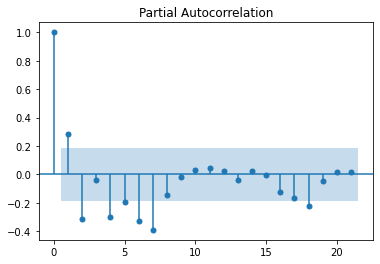

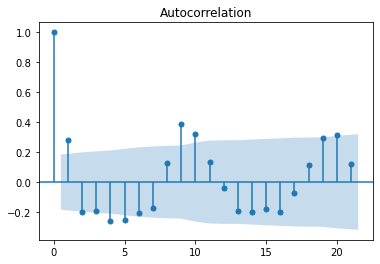

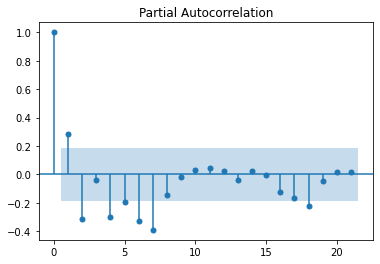

In [85]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
 
plot_acf(d_data)
plot_pacf(d_data)



In [86]:
from statsmodels.tsa.arima_model import ARIMA
 
tmp = []
for p in range(4):
    for q in range(4):
        try:
            tmp.append([ARIMA(data,(p,1,q)).fit().bic,p,q])
        except:
            tmp.append([None,p,q])
 
tmp = pd.DataFrame(tmp,columns = ['aic','p','q'])
tmp[tmp['aic'] ==tmp['aic'].min()]



/Users/ericchang/.conda/envs/mcm1/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.55498D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   0.000D+00   8.555D+00
  F =   8.5549752919114805     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.4

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.46895D+00    |proj g|=  1.81242D-03

At iterate    5    f=  8.46893D+00    |proj g|=  1.77636D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      9      1     0     0   1.776D-07   8.469D+00
  F =   8.4689326473989954     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.


  ys=-2.597E-13  -gs= 3.934E-13 BFGS update SKIPPED

At iterate   10    f=  8.48558D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     18      1     1     0   0.000D+00   8.486D+00
  F =   8.4855827967541195     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.46642D+00    |proj g|=  2.65725D-03

At iterate    5    f=  8.46640D+00    |proj g|=  1.06581D-06

At iterate   10  

 This problem is unconstrained.



At iterate   15    f=  8.46640D+00    |proj g|=  3.56692D-04

At iterate   20    f=  8.46640D+00    |proj g|=  4.20997D-05

At iterate   25    f=  8.46640D+00    |proj g|=  1.77636D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     33      1     0     0   1.776D-07   8.466D+00
  F =   8.4663994862103529     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.33965D+00    |proj g|=  1.14181D-02


 This problem is unconstrained.



At iterate    5    f=  8.33914D+00    |proj g|=  1.16721D-02

At iterate   10    f=  8.33377D+00    |proj g|=  6.97504D-03

At iterate   15    f=  8.33370D+00    |proj g|=  1.77636D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     18      1     0     0   1.776D-07   8.334D+00
  F =   8.3336969967751191     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.30663D+00    |proj g|=  1.28630D-02

At iter

 This problem is unconstrained.



At iterate   25    f=  8.30412D+00    |proj g|=  5.32907D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     32      1     0     0   5.329D-07   8.304D+00
  F =   8.3041213371086524     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.46561D+00    |proj g|=  2.63771D-03

At iterate    5    f=  8.46559D+00    |proj g|=  2.48690D-06

At iterate   10    f=  8.46559D+00    |proj g|=  5.80869D-05

At iter

 This problem is unconstrained.



At iterate   25    f=  8.46559D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     32      1     0     0   0.000D+00   8.466D+00
  F =   8.4655855579576631     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.33810D+00    |proj g|=  5.65308D-03

At iterate    5    f=  8.33779D+00    |proj g|=  5.63034D-03

At iterate   10    f=  8.33384D+00    |proj g|=  1.17785D-02

At iterate   15    f=  8.33315D+00    |proj g|=  1.77636D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     22      1     0     0   3.553D-07   8.333D+00
  F =   8.3331516325033004     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.


At iterate   15    f=  8.29661D+00    |proj g|=  1.57865D-03

At iterate   20    f=  8.29660D+00    |proj g|=  7.10543D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     22     26      1     0     0   5.329D-07   8.297D+00
  F =   8.2966001807446936     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


,aic,p,q
9,1907.05246,2,1


In [88]:
model = ARIMA(data,(0,1,1)).fit()
model.summary()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.48107D+00    |proj g|=  2.08562D-03

At iterate    5    f=  8.48105D+00    |proj g|=  7.10543D-06

At iterate   10    f=  8.48105D+00    |proj g|=  3.58824D-05

At iterate   15    f=  8.48105D+00    |proj g|=  3.55271D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     17     29      1     0     0   0.000D+00   8.481D+00
  F =   8.4810540555863536     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/ericchang/.conda/envs/mcm1/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  113
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -958.359
Method:                       css-mle   S.D. of innovations           1165.651
Date:                Sun, 19 Dec 2021   AIC                           1922.718
Time:                        15:18:09   BIC                           1930.900
Sample:                             1   HQIC                          1926.038
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.6450    160.252      0.179      0.858    -285.444     342.734
ma.L1.D.y      0.4655      0.093      5.000      0.000       0.283       0.648
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -2.1481           +0.0000j            2.1481            0.5000
-----------------------------------------------------------------------------
"""

In [91]:

yp = model.forecast(2)#预测未来5年
yp[0]

array([3551.39435071, 3580.03936518])

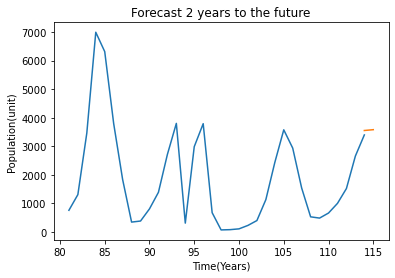

In [92]:
index=np.arange(1,115)

plt.plot(index[80:115],data[80:115])
plt.plot(np.arange(114,116),yp[0])
plt.xlabel('Time(Years)')
plt.ylabel('Population(unit)')
plt.title("Forecast 2 years to the future")
plt.savefig('pred.pdf')